# TODO

 - dependency parsing, e.g. with spaCy
 - 

In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from ngrams import Ngram

In [11]:
df = pd.read_csv("../NMvW_data/v0.csv.gz", 
                 dtype=dict(Provenance="string", RelatedWorks="string"))

# TODO: save & load DF s.t. these lines are not necessary here                
df["ObjectID"] = df.ObjectID.astype("int")
df = df.set_index("ObjectID")

In [12]:
docs = list(df.Title.dropna())
ng = Ngram(ns=2, documents=docs, precompute_freqs=True)

(1, 2)-grams: Padding documents...: 100%|██████████| 495236/495236 [00:00<00:00, 1720226.73it/s]


(1, 2)-grams: Term Document Matrix constructed...
(1, 2)-grams: Term frequencies precomputed...
(1, 2)-grams: Init done


In [48]:
# def pmi(w1, w2):
#     tup = w1 + " " + w2
#     return ng.prob(tup, log=True) - (ng.prob(w1, log=True)+ng.prob(w2, log=True))

# pmis = [[(w1, w2, pmi(w1, w2)) for w1, w2 in list(ng.iter_ngrams(s, as_tuples=True))]
#              for s in tqdm(docs[:10000])]



def pmi(tup):
    w1, w2 = tup.split()
    return ng.prob(tup, log=True) - (ng.prob(w1, log=True)+ng.prob(w2, log=True))
    
pmis = {w: pmi(w) for w in tqdm(ng.vocab(2))}


100%|██████████| 662002/662002 [00:11<00:00, 55534.78it/s]


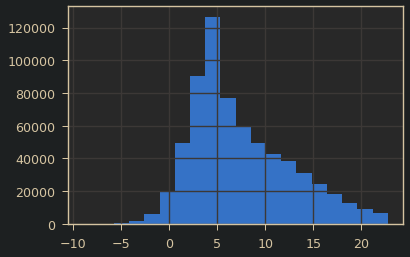

In [52]:
_=plt.hist(pmis.values(), bins=20)

In [62]:
more_than_once = {w: pmi for w, pmi in pmis.items() if sum(map(ng.freq, w.split())) > 100}
sorted(more_than_once.items(), key=lambda tup: tup[1], reverse=True)[:100]

[('loreto jarriza', 16.951695341063072),
 ('wah landbouwgemeenschap', 16.922548995403556),
 ('schedelhuis geriten', 16.836432794433037),
 ('kanei tsuho', 16.80231771702484),
 ('perspectiefprent ukie', 16.769580930612843),
 ('zestig provincies', 16.7572375691663),
 ('rozenwater sprenkelaar', 16.734103905990445),
 ('harinxma thoe', 16.688660935229276),
 ('stoffelijk overschot', 16.688319428530825),
 ('thoe slooten', 16.666965864129953),
 ('anton heckler', 16.65828728618576),
 ('meiji regering', 16.63853745580344),
 ('olympic games', 16.62453059780956),
 ('rapa daya', 16.582398386850194),
 ('dajeuh manggung', 16.563130053145414),
 ('tangkuban prahu', 16.544609965174615),
 ('bataksche etnografische', 16.54125555352266),
 ('oleh rahwana', 16.518042163616883),
 ('garis miring', 16.504236364091845),
 ('sunda kelapa', 16.502829542877606),
 ('ka aba', 16.48512754114414),
 ('mon souci', 16.458880091148735),
 ('rudolf bonnet', 16.44911379285376),
 ('juana dominguez', 16.44765283572549),
 ('hoeta 

In [28]:
ng.prob("een van"), ng.prob("een")*ng.prob("van"),\
ng.prob("een van", log=True) - (ng.prob("een", log=True)+ng.prob("van", log=True))

(0.00022258471477817866, 0.0015053521229291258, -1.8566820314852333)

In [27]:
np.log2(7.071283357573907e-05/1.7039905448865723e-05)

2.0530547412023785